### Restaurant user data
* This data set holds information on 200 restaurant customers including demographics, dining preferences, and ratings.
* The aim of this EDA is to investigate customer behavior patterns,
* recognize influences on satisfaction, and provide insights
* to assist in enhancing restaurant service and marketing practices.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df= pd.read_csv(r"Cuisine_rating.csv", header=0)

In [10]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [11]:
df.shape

(200, 15)

In [12]:
# Searching for any null values.
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64


In [13]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


#### Inserting an age column

In [14]:
df["Age"] = 2025 - df["YOB"]

In [15]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,19
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,34
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,48
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,69
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,43
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,25
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,19
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,23


#### Q1: Age Distribution 

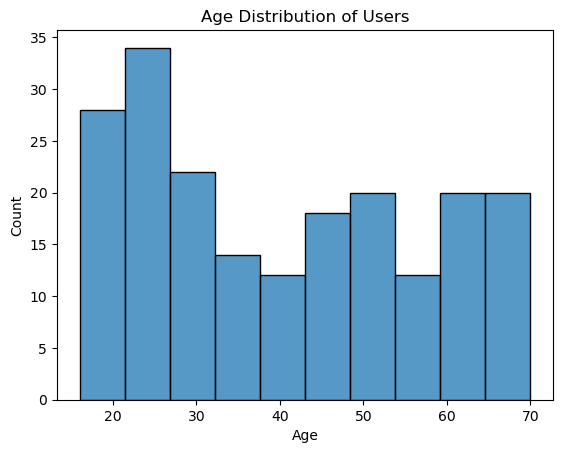

In [16]:
plt.figure
sns.histplot(df["Age"], bins=10)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The user base is primarily composed of young adults, with a secondary significant presence of users aged 50 and above.

#### Q2. Generate descriptive statistics of the columns.

In [17]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000,40.170000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445,16.809339
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000,16.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000,25.000000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000,38.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000,54.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000,70.000000


#### Q3. What are the top 5 most frequent 'Cuisines'?

Cuisines
Japanese    36
French      34
Filipino    34
Indian      32
Chinese     24
Name: count, dtype: int64


Text(0, 0.5, 'Number of Users')

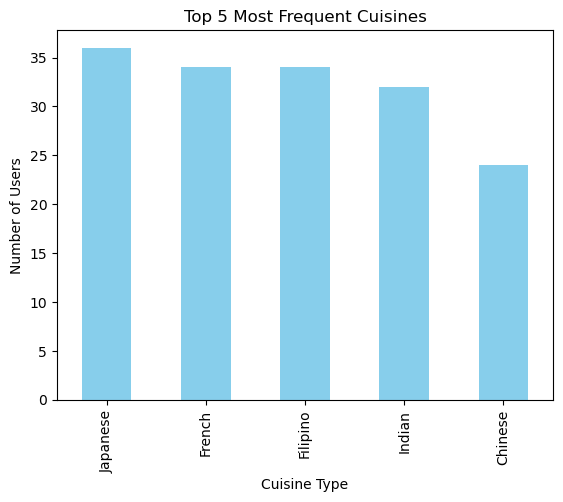

In [18]:
print(df['Cuisines'].value_counts().head(5))
plt.figure
df['Cuisines'].value_counts().head(5).plot(kind='bar',color='skyblue')
plt.title('Top 5 Most Frequent Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Users')

Japanese and French are the most popular choices, accounting for over 70% of entries.

#### Q4. What is the distribution of the 'Year of Birth (YOB)' for the dataset?

<Axes: >

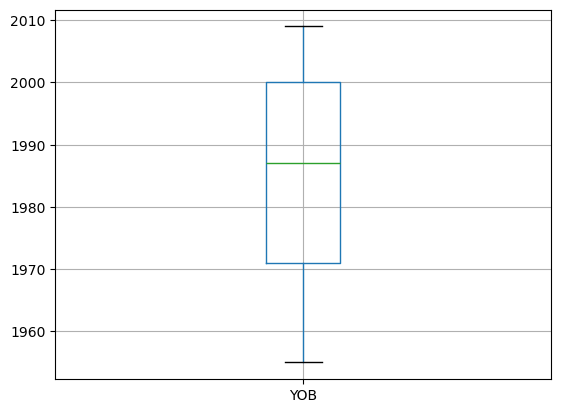

In [19]:
df.boxplot(column='YOB')

The median YOB in the dataset is 1988, with half born before and half after. The core birth years span nearly three decades, with the median line slightly below the center. The distribution is symmetrical but possibly with a slight negative skew, with the oldest birth years closer to the median.

#### Q5. Overall Rating by Gender

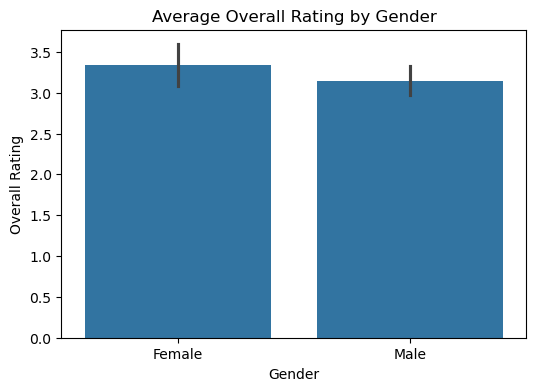

In [20]:
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Overall Rating", data=df, estimator=np.mean)
plt.title("Average Overall Rating by Gender")
plt.show()

Females have a slightly higher average overall rating (approximately 3.3) compared to Males (approximately 3.1).

#### Q6. Service Rating Distribution

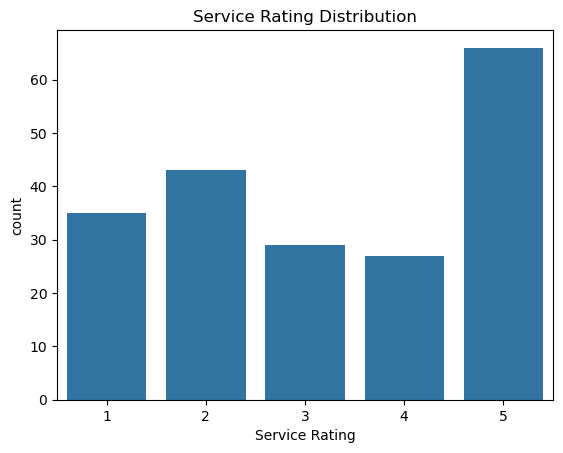

In [21]:
sns.countplot(x='Service Rating', data=df)
plt.title("Service Rating Distribution")
plt.show()

The service evokes strong reactions,as indicated by the extreme numbers of both the highest (5) and lowest (2) ratings. The firm is either creating predominantly very satisfied or fairly dissatisfied customers, with few users falling into the middle or just-above-average category.

#### Q7. Location vs Overall Rating

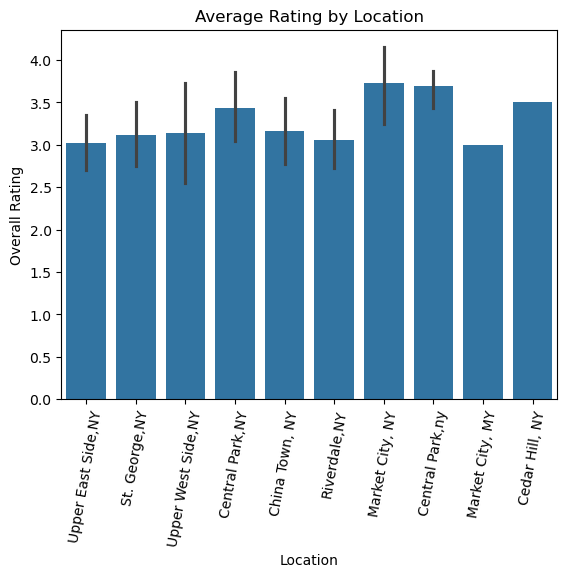

In [22]:
top_locs = df['Location'].value_counts().index[:10]
sns.barplot(x='Location', y='Overall Rating', data=df[df['Location'].isin(top_locs)])
plt.xticks(rotation=80)
plt.title("Average Rating by Location")
plt.show()

There is an observable difference in average satisfaction across locations, with Market City, NY showing the highest average rating. However, the differences are modest, and the overlapping confidence intervals indicate that the average ratings for many of the areas are not statistically distinguishable.

#### Q8. Do smoking habits differ by marital status?

In [23]:
pd.crosstab(df['Marital Status'],['Smoker'])

col_0,Smoker
Marital Status,
Divorced,14
Married,86
Single,100


Single individuals smoke slightly more.

#### Q9. Visualize age-based drinking habits.

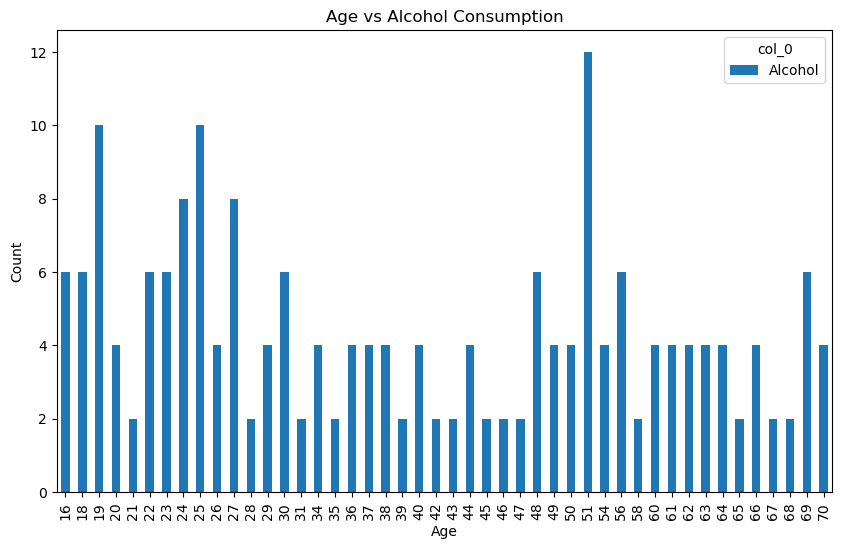

In [39]:
pd.crosstab(df['Age'],['Alcohol']).plot(kind='bar', figsize=(10,6))
plt.title("Age vs Alcohol Consumption")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Alcohol consumption counts appear to be concentrated in two main age groups: young adults (early to mid-20s) and a specific spike in the early 50s. Middle-aged individuals show the lowest and most stable counts.

#### Q.10 Average Budget by Age Group

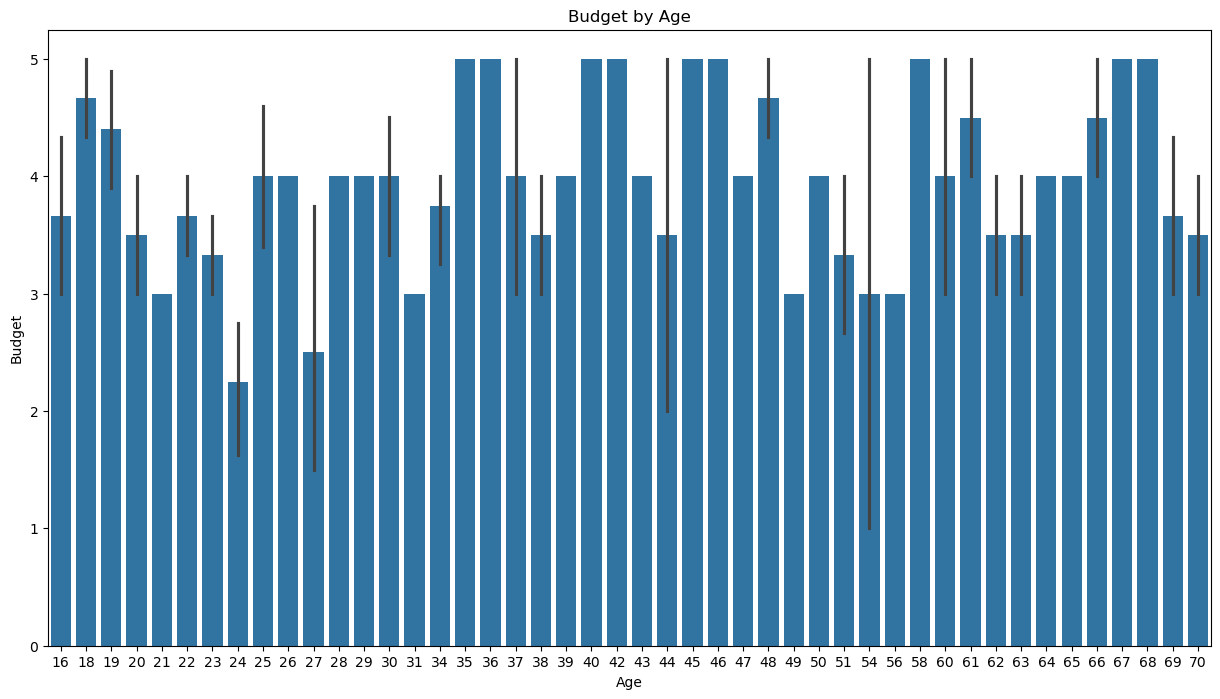

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age', y='Budget', data=df)
plt.title("Budget by Age")
plt.show()


#### High variability within each age group means there's no reliable evidence of a strong, consistent relationship between age and average budget.

#### Q11. Which 'Cuisines' are most popular among 'Students'?

<Axes: xlabel='Cuisines'>

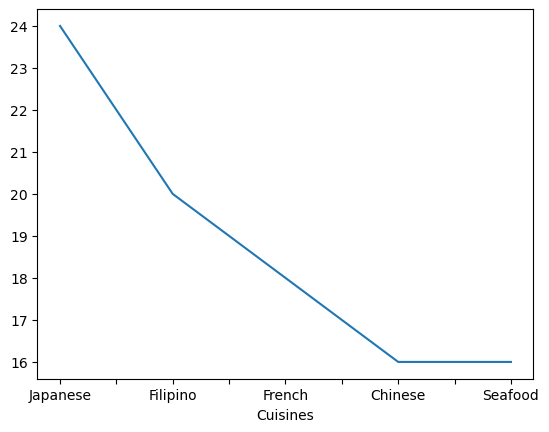

In [57]:
df[df['Activity']=='Student']['Cuisines'].value_counts().head(5).plot()

The preference for Japanese cuisine is much stronger than for the other top cuisines, with the bottom three of the top five choices showing significantly lower and very similar popularity.

#### Q12. What is the correlation between Food Rating, Service Rating, and the final Overall Rating?

In [59]:
df[['Food Rating','Service Rating','Overall Rating']].corr()

,Food Rating,Service Rating,Overall Rating
Food Rating,1.000000,0.079056,0.709562
Service Rating,0.079056,1.000000,0.758532
Overall Rating,0.709562,0.758532,1.000000


The ratings for food and service are largely independent, suggesting that the quality of the food does not directly predict the quality of the service, and vice versa.

#### Q13. Age Group vs Often A S

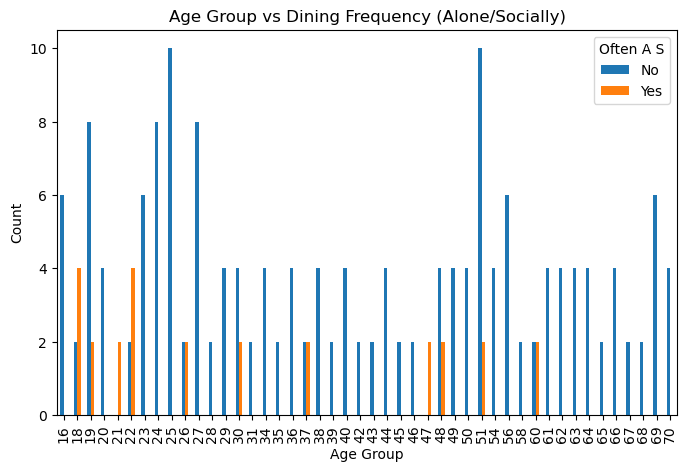

In [61]:
pd.crosstab(df['Age'], df['Often A S']).plot(kind='bar', figsize=(8,5))
plt.title("Age Group vs Dining Frequency (Alone/Socially)")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

Dining in the manner measured by the dominant "No" category is most common among young adults (18-27) and specific older ages (50 and 70), while the "Yes" category is infrequent across the entire age spectrum.

#### Customer satisfaction is primarily measured by overall rating, with service quality being the top priority. Strategies include investing in employee training, targeting Japanese cuisine, and focusing on location specificity.